# ECG Anomaly Detection with Autoencoder
**Dataset:** ECG Signal Dataset (140 features + 1 label)


## Step 1: Import Required Libraries
We load all necessary libraries for data processing, modeling, and visualization.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

## Step 2: Load the Dataset
We read the ECG dataset and separate features from labels.

In [2]:
df = pd.read_csv("ecg 2.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X.shape, y.shape

((3316, 140), (3316,))

## Step 3: Exploratory Data Analysis (EDA)
Check the balance of normal vs anomaly cases.

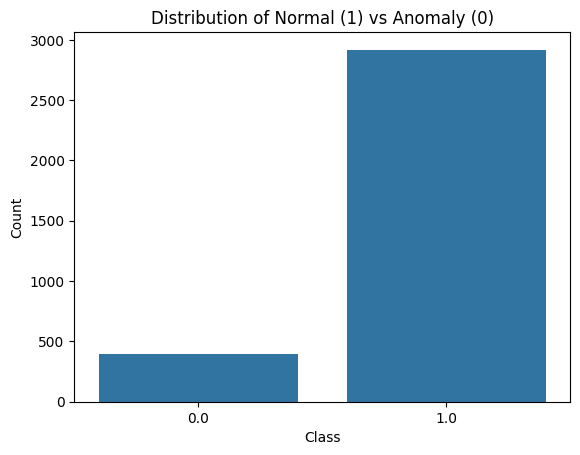

In [3]:
sns.countplot(x=y)
plt.title("Distribution of Normal (1) vs Anomaly (0)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

## Step 4: Data Splitting
We split the dataset for training (only normal) and testing (both classes).

In [4]:
X_train = X[y == 1]  # Only normal class for training
X_test = X
y_test = y
X_train.shape, X_test.shape

((2918, 140), (3316, 140))

## Step 5: Build Autoencoder
We define a simple symmetric autoencoder with dense layers.

In [5]:
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation="relu")(input_layer)
encoded = Dense(32, activation="relu")(encoded)
decoded = Dense(64, activation="relu")(encoded)
output_layer = Dense(input_dim, activation="linear")(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 140)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           9,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 140)                 │           9,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,316 (87.17 KB)

 Trainable params: 22,316 (87.17 KB)

 Non-trainable params: 0 (0.00 B)

## Step 6: Train Autoencoder
We train the model to reconstruct normal ECG signals.

In [6]:
history = autoencoder.fit(X_train, X_train,
                        epochs=50,
                        batch_size=32,
                        shuffle=True,
                        validation_data=(X_train, X_train),
                        verbose=1)

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.6293 - val_loss: 0.0988
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0797 - val_loss: 0.0466
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0436 - val_loss: 0.0329
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0317 - val_loss: 0.0262
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0251 - val_loss: 0.0226
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0217 - val_loss: 0.0211
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0199 - val_loss: 0.0187
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0193 - val_loss: 0.0171
Epoch 9/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0176 - val_loss: 0.0169
Epoch 10/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0159 - val_loss: 0.0153
Epoch 11/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0145 - val_loss: 0.0151
Epoch 12/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 - val

## Step 7: Reconstruction Error
We compute MSE reconstruction error on the test set.

In [7]:
reconstructions = autoencoder.predict(X_test)
mse = np.mean(np.square(X_test - reconstructions), axis=1)

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


## Step 8: Determine Threshold
Use training MSE to select a threshold for anomaly detection.

In [8]:
threshold = np.percentile(mse[y == 1], 95)
print("Threshold (95th percentile):", threshold)

Threshold (95th percentile): 0.018511313751312906


## Step 9: Predict Anomalies
Label as anomaly if reconstruction error exceeds threshold.

In [10]:
print("NaNs in mse:", np.isnan(mse).sum())

NaNs in mse: 1


In [11]:
mse = np.nan_to_num(mse)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Check and clean MSE
print("NaNs in mse before cleaning:", np.isnan(mse).sum())
mse = np.nan_to_num(mse)

# Predict anomalies
y_pred = (mse > threshold).astype(int)
y_true = (y == 0).astype(int)  # 1 = anomaly

# Evaluation
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))
print("ROC AUC Score:", roc_auc_score(y_true, mse))


NaNs in mse before cleaning: 0
[[2773  146]
 [   5  392]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2919
           1       0.73      0.99      0.84       397

    accuracy                           0.95      3316
   macro avg       0.86      0.97      0.91      3316
weighted avg       0.97      0.95      0.96      3316

ROC AUC Score: 0.992004956667987


## Step 10: Visualize MSE Distribution
Visualize the separation between normal and anomalies.

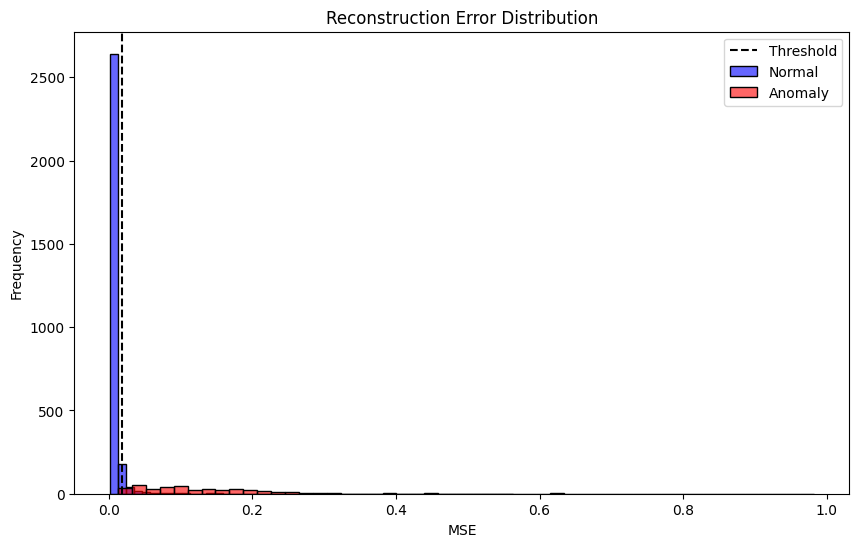

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(mse[y == 1], color='blue', label='Normal', bins=50, alpha=0.6)
sns.histplot(mse[y == 0], color='red', label='Anomaly', bins=50, alpha=0.6)
plt.axvline(threshold, color='black', linestyle='--', label='Threshold')
plt.legend()
plt.title("Reconstruction Error Distribution")
plt.xlabel("MSE")
plt.ylabel("Frequency")
plt.show()